In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('churn_prediction.csv')

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
df.shape

(28382, 21)

In [5]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [6]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [8]:
df['gender'].head()

0    Male
1    Male
2    Male
3     NaN
4    Male
Name: gender, dtype: object

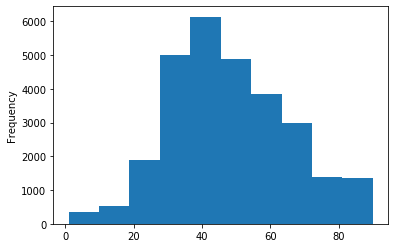

In [9]:
df['age'].plot.hist()

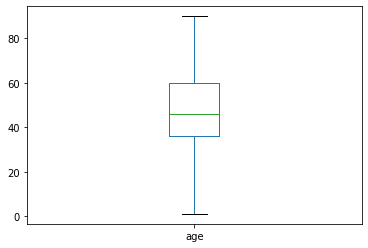

In [10]:
df['age'].plot.box()

In [11]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [12]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [13]:
df['churn'].corr(df['days_since_last_transaction'])

-0.055830173542949155

In [14]:

df['churn'].corr(df['current_balance'])

-0.024181222132867015

In [15]:
df.groupby('churn')['age'].mean()

churn
0    48.378298
1    47.461217
Name: age, dtype: float64

In [16]:
df.groupby('churn')['dependents'].mean()

churn
0    0.331445
1    0.417917
Name: dependents, dtype: float64

In [17]:
# As it can be seen , churn rates are higher for those individuals who have a higher number of dependants which is quite intuitive 


In [18]:
df.groupby('churn')['previous_month_end_balance'].mean()

churn
0    7356.086973
1    8109.794051
Name: previous_month_end_balance, dtype: float64

In [19]:
df.groupby('churn')['average_monthly_balance_prevQ'].mean()

churn
0    7258.754771
1    8543.094684
Name: average_monthly_balance_prevQ, dtype: float64

In [20]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [21]:
df.groupby('churn')['current_month_credit'].mean()

churn
0    2670.323390
1    6786.948224
Name: current_month_credit, dtype: float64

In [22]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [23]:
df['dependents'].mean()

0.34723561865812724

In [24]:
df['dependents'].fillna(df['dependents'].mean(), inplace=True)

In [25]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [26]:
df['gender'].head()

0    Male
1    Male
2    Male
3     NaN
4    Male
Name: gender, dtype: object

In [27]:
df['occupation'].tail()

28377          student
28378    self_employed
28379         salaried
28380    self_employed
28381          student
Name: occupation, dtype: object

In [28]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [29]:
df['occupation'].fillna('self_employed' , inplace=True)


In [30]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [31]:
df['city'].value_counts() , df['city'].mean()

(1020.0    3479
 1096.0    2016
 409.0     1334
 146.0     1291
 834.0     1138
           ... 
 629.0        1
 527.0        1
 1212.0       1
 530.0        1
 70.0         1
 Name: city, Length: 1604, dtype: int64,
 796.1095761267632)

In [32]:
df['city'].fillna('796' , inplace=True)


In [33]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [34]:
df['days_since_last_transaction'].value_counts() , df['days_since_last_transaction'].mean(), df['days_since_last_transaction'].mode

(0.0      1672
 3.0       831
 14.0      654
 4.0       632
 6.0       596
          ... 
 170.0       1
 218.0       1
 334.0       1
 288.0       1
 321.0       1
 Name: days_since_last_transaction, Length: 360, dtype: int64,
 69.99781390357327,
 <bound method Series.mode of 0        224.0
 1         60.0
 2          NaN
 3        147.0
 4         58.0
          ...  
 28377     70.0
 28378     14.0
 28379      0.0
 28380      NaN
 28381     59.0
 Name: days_since_last_transaction, Length: 28382, dtype: float64>)

In [35]:
df['days_since_last_transaction'].fillna('69' , inplace=True)


In [36]:
df.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
gender                            525
dependents                          0
occupation                          0
city                                0
customer_nw_category                0
branch_code                         0
days_since_last_transaction         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
dtype: int64

In [37]:
df['age'].value_counts()

90    1003
40     722
43     711
42     699
37     691
      ... 
3       34
89      24
88      20
2       17
1        4
Name: age, Length: 90, dtype: int64

In [38]:
bins=[0,15,60,91]
group=['children', 'adults' , 'senior citizens']

In [39]:

df['type']=pd.cut(df['age'], bins , labels=group)

In [40]:
df['type'].value_counts()

adults             20646
senior citizens     7052
children             684
Name: type, dtype: int64

In [41]:
df['Age_category']=type

In [42]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn', 'type',
       'Age_category'],
      dtype='object')

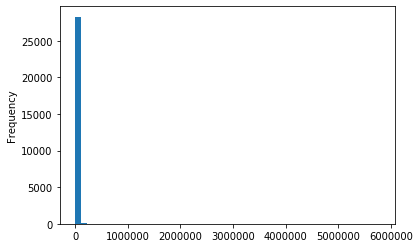

In [43]:
df['current_month_balance'].plot.hist(bins=50)

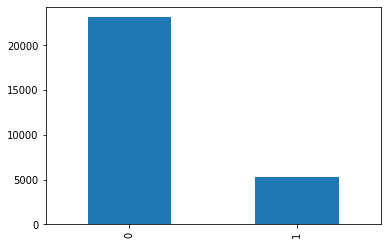

In [44]:
df['churn'].value_counts().plot(kind='bar')

In [45]:
df['gender'].mode()

0    Male
dtype: object

In [46]:
df['gender'].fillna('male', inplace=True) , df.isnull().sum()

(None,
 customer_id                       0
 vintage                           0
 age                               0
 gender                            0
 dependents                        0
 occupation                        0
 city                              0
 customer_nw_category              0
 branch_code                       0
 days_since_last_transaction       0
 current_balance                   0
 previous_month_end_balance        0
 average_monthly_balance_prevQ     0
 average_monthly_balance_prevQ2    0
 current_month_credit              0
 previous_month_credit             0
 current_month_debit               0
 previous_month_debit              0
 current_month_balance             0
 previous_month_balance            0
 churn                             0
 type                              0
 Age_category                      0
 dtype: int64)

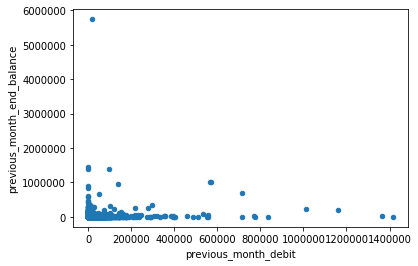

In [47]:
df.plot.scatter('previous_month_debit' , 'previous_month_end_balance')

In [48]:
df[df['previous_month_end_balance']>5000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,type,Age_category
9908,10575,1670,90,male,0.347236,self_employed,243,2,2542,18,...,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0,senior citizens,<class 'type'>


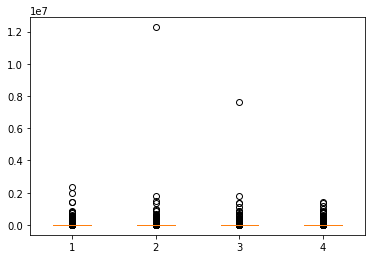

In [49]:

ax=plt.figure().add_subplot()
bp=ax.boxplot([df['previous_month_credit'] , df['current_month_credit'] , df['current_month_debit'] , df['previous_month_debit']])

In [50]:
df.groupby('occupation').current_month_credit.median()

occupation
company          0.48
retired          0.61
salaried         0.69
self_employed    0.61
student          0.49
Name: current_month_credit, dtype: float64

In [51]:
df.groupby('occupation').current_month_debit.median()

occupation
company            0.585
retired           19.950
salaried         287.650
self_employed     76.405
student            0.560
Name: current_month_debit, dtype: float64

In [52]:
df.groupby('occupation').current_month_balance.median()

occupation
company          3111.670
retired          3402.300
salaried         3544.200
self_employed    3505.935
student          2834.675
Name: current_month_balance, dtype: float64

In [53]:
df.groupby('occupation').customer_nw_category.median()

occupation
company          2
retired          2
salaried         2
self_employed    2
student          2
Name: customer_nw_category, dtype: int64

In [54]:
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [55]:
df.pivot_table(values='current_month_balance' , index='occupation' , aggfunc='median')


,current_month_balance
occupation,
company,3111.670
retired,3402.300
salaried,3544.200
self_employed,3505.935
student,2834.675


In [56]:
df.pivot_table(values='current_month_credit' , index='occupation' , aggfunc='median')


,current_month_credit
occupation,
company,0.48
retired,0.61
salaried,0.69
self_employed,0.61
student,0.49


In [57]:
df.pivot_table(values='current_month_debit' , index='occupation' , aggfunc='median')

,current_month_debit
occupation,
company,0.585
retired,19.950
salaried,287.650
self_employed,76.405
student,0.560


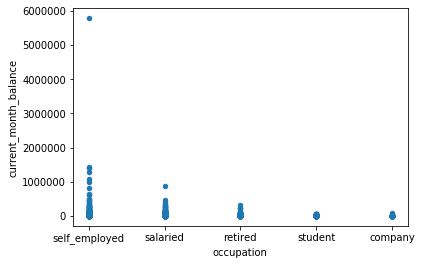

In [58]:
df.plot.scatter('occupation' , 'current_month_balance')

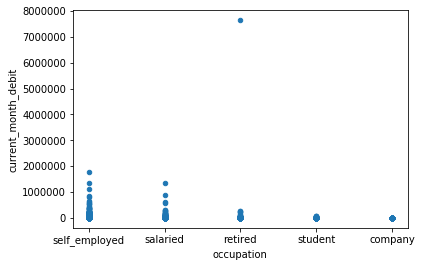

In [59]:
df.plot.scatter('occupation' , 'current_month_debit')

In [60]:
# segregating variables


In [61]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn', 'type',
       'Age_category'],
      dtype='object')

In [62]:
df['churn'].head()


0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

In [63]:
x=df.drop(['churn'] , axis=1)
y=df['churn']

In [64]:
x.shape , y.shape

((28382, 22), (28382,))

In [65]:
data.dtypes

NameError: name 'data' is not defined

In [66]:
# I had made a small mistake in an above command which could not be revoked, so I am re-importing the csv file as another table 
#named data, but all the commands executed above which include the graphs are all accurate (because they were made before my mistake
# ALl the missing values have been mmodified or imputed

In [67]:
data=pd.read_csv('churn_prediction.csv')

In [68]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [69]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [70]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [71]:
data['days_since_last_transaction'].fillna('69' , inplace=True)
data['city'].fillna('796' , inplace=True)
data['occupation'].fillna('self_employed' , inplace=True)


In [72]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [73]:
data['dependents'].fillna(data['dependents'].mean(), inplace=True)

In [74]:
bins=[0,15,60,91]
group=['children', 'adults' , 'senior citizens']
data['type']=pd.cut(data['age'], bins , labels=group)

In [75]:
data['Age_category']=type

In [76]:
data.describe()

,customer_id,vintage,age,dependents,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.953388,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [77]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [78]:
data.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
gender                            525
dependents                          0
occupation                          0
city                                0
customer_nw_category                0
branch_code                         0
days_since_last_transaction         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
type                                0
Age_category                        0
dtype: int64

In [79]:
data['gender'].fillna('Male', inplace=True) , data.isnull().sum()

(None,
 customer_id                       0
 vintage                           0
 age                               0
 gender                            0
 dependents                        0
 occupation                        0
 city                              0
 customer_nw_category              0
 branch_code                       0
 days_since_last_transaction       0
 current_balance                   0
 previous_month_end_balance        0
 average_monthly_balance_prevQ     0
 average_monthly_balance_prevQ2    0
 current_month_credit              0
 previous_month_credit             0
 current_month_debit               0
 previous_month_debit              0
 current_month_balance             0
 previous_month_balance            0
 churn                             0
 type                              0
 Age_category                      0
 dtype: int64)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [81]:
data['gender'].value_counts()

Male      16548
Female    11309
male        525
Name: gender, dtype: int64

In [82]:
data['gender'].replace({'male' : 'Male'} , inplace=True )


In [83]:
data['gender'].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [84]:
pd.get_dummies(data['gender']).head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [85]:
new=pd.get_dummies(data['gender'])

In [86]:
new.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [87]:
df = pd.DataFrame(data)

In [88]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,type,Age_category
0,1,3135,66,Male,0.000000,self_employed,187,2,755,224,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,senior citizens,<class 'type'>
1,2,310,35,Male,0.000000,self_employed,796,2,3214,60,...,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,adults,<class 'type'>
2,4,2356,31,Male,0.000000,salaried,146,2,41,69,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,adults,<class 'type'>
3,5,478,90,Male,0.347236,self_employed,1020,2,582,147,...,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,senior citizens,<class 'type'>
4,6,2531,42,Male,2.000000,self_employed,1494,3,388,58,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,adults,<class 'type'>


In [89]:
df['gender']=pd.get_dummies(data['gender'])

In [ ]:
df.head()

In [ ]:
df.tail()

In [90]:
df['occupation']=pd.get_dummies(data['occupation'])
df.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,type,Age_category
28377,30297,1845,10,1,0.0,0,1020,2,1207,70,...,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,children,<class 'type'>
28378,30298,4919,34,1,0.0,0,1046,2,223,14,...,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,adults,<class 'type'>
28379,30299,297,47,0,0.0,0,1096,2,588,0,...,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,adults,<class 'type'>
28380,30300,2585,50,0,3.0,0,1219,3,274,69,...,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,adults,<class 'type'>
28381,30301,2349,18,0,0.0,0,1232,2,474,59,...,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,adults,<class 'type'>


In [91]:
df['type']=pd.get_dummies(data['type'])

In [ ]:
df.head()

In [92]:
df['occupation'].value_counts()

0    28342
1       40
Name: occupation, dtype: int64

In [93]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                              uint8
dependents                        float64
occupation                          uint8
city                               object
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction        object
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
type                                uint8
Age_category                       object
dtype: object

In [94]:
df=pd.get_dummies(data)

In [95]:
df.dtypes

customer_id                            int64
vintage                                int64
age                                    int64
gender                                 uint8
dependents                           float64
                                      ...   
days_since_last_transaction_363.0      uint8
days_since_last_transaction_364.0      uint8
days_since_last_transaction_365.0      uint8
days_since_last_transaction_69         uint8
Age_category_<class 'type'>            uint8
Length: 1987, dtype: object

In [96]:
x=df.drop(['churn'], axis=1)
y=df['churn']

In [97]:
x.shape, y.shape

((28382, 1986), (28382,))

In [98]:
x_scaled=scaler.fit_transform(x)

In [99]:
x=pd.DataFrame(x_scaled, columns=x.columns)

In [100]:
x.head()

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,current_balance,previous_month_end_balance,...,days_since_last_transaction_357.0,days_since_last_transaction_359.0,days_since_last_transaction_360.0,days_since_last_transaction_361.0,days_since_last_transaction_362.0,days_since_last_transaction_363.0,days_since_last_transaction_364.0,days_since_last_transaction_365.0,days_since_last_transaction_69,Age_category_<class 'type'>
0,0.000000,0.232330,0.730337,0.0,0.000000,0.0,0.5,0.157708,0.001178,0.000802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000033,0.010221,0.382022,0.0,0.000000,0.0,0.5,0.672035,0.001843,0.002064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000099,0.171083,0.337079,0.0,0.000000,0.0,0.5,0.008366,0.001593,0.001561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000132,0.023430,1.000000,0.0,0.006678,0.0,0.5,0.121523,0.001319,0.000947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000165,0.184842,0.460674,0.0,0.038462,0.0,1.0,0.080945,0.001088,0.000792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# Importing the train test split function

In [102]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y , random_state=56, stratify=y)

# KNN Model

In [103]:
#importing KNN classifier and metric F1 score

In [104]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [105]:
from sklearn.metrics import f1_score

In [106]:
clf=KNC(n_neighbors=5)

In [107]:
clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [108]:
test_predict=clf.predict(test_x)
k=f1_score(test_predict, test_y)
print('Test F1 score  ' ,k)

Test F1 score   0.07429245283018866


In [ ]:
#ELBOW for classifier

In [ ]:
def elbow(K):
    test_error=[]
    for i in K:
        clf=KNC(n_neighbors=i)
        clf.fit(train_x, train_y)
        tmp=clf.predict(test_x)
        tmp=f1_score(tmp, test_y)
        error=1-tmp
        test_error.append(error)
    return test_error

In [ ]:
k=range(6,20,2)

In [ ]:
test=elbow(k)